In [3]:
from gurobipy import Model, GRB

# Sample data
costs = [10, 20, 30, 40, 50, 60, 70]    # c_i
weights = [4, 6, 1, 11, 9, 3, 1]        # w_i
W = 15                                # capacity of knapsack

# Create a new model
m = Model("binary_knapsack")

# Add variables
x = m.addVars(len(costs), vtype=GRB.BINARY, name="x")

# Set the objective to maximize cost
m.setObjective(sum(costs[i]*x[i] for i in range(len(costs))), GRB.MAXIMIZE)

# Add weight constraint
m.addConstr(sum(weights[i]*x[i] for i in range(len(costs))) <= W, "weight_limit")

# Optimize model
m.optimize()

# Output solution
if m.status == GRB.Status.OPTIMAL:
    print("Optimal solution found!")
    for i in range(len(costs)):
        if x[i].X > 0.5:
            print(f"Item {i}: Cost = {costs[i]}, Weight = {weights[i]}")
    print(f"Total Cost: {m.objVal}")
else:
    print("No solution found.")


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1 rows, 7 columns and 7 nonzeros
Model fingerprint: 0x2d831b00
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 190.0000000
Presolve removed 1 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 210 190 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.100000000000e+02, best bound 2.100000000000e+02, gap 0.0000%
Optimal solution found!
Item 2: Cost = 30, Weight = 1
Item 4: Cost = 50, Weight = 9
Item 5: Cost = 60, Weight = 3
Item 6: Cost = 70, Weight = 1
To

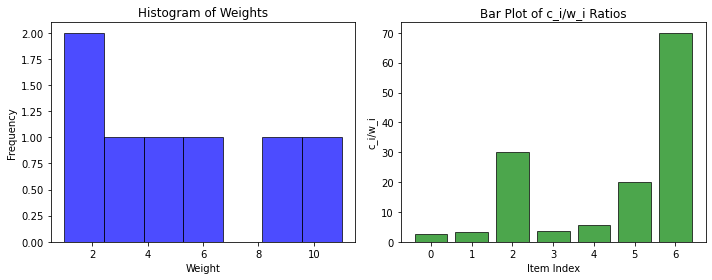

In [4]:
import matplotlib.pyplot as plt

# Sample data
costs = [10, 20, 30, 40, 50, 60, 70]    # c_i
weights = [4, 6, 1, 11, 9, 3, 1]        # w_i

# Calculate ratios
ratios = [c/w for c, w in zip(costs, weights)]

# Plot histogram for weights
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(weights, bins=7, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Weights")

# Plot bar plot for c_i/w_i ratios
plt.subplot(1, 2, 2)
plt.bar(range(len(ratios)), ratios, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Item Index")
plt.ylabel("c_i/w_i")
plt.title("Bar Plot of c_i/w_i Ratios")

# Display the plots
plt.tight_layout()
plt.show()
